In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Grafique w(t) = z(t)*r(2(t + k) - 6) Con k = 2(a+1) con a = último número de la cédula (10%)

In [2]:
a = 2
k = 2*(a + 1)
k

6

In [3]:
t = np.linspace(-5, 10, 500)

In [4]:
def escalon(t, t0):
    return np.where(t >= t0, 1, 0)
  
def rampa(t, t0):
    return np.where(t >= t0, t, 0)

Text(0, 0.5, 'Amplitud')

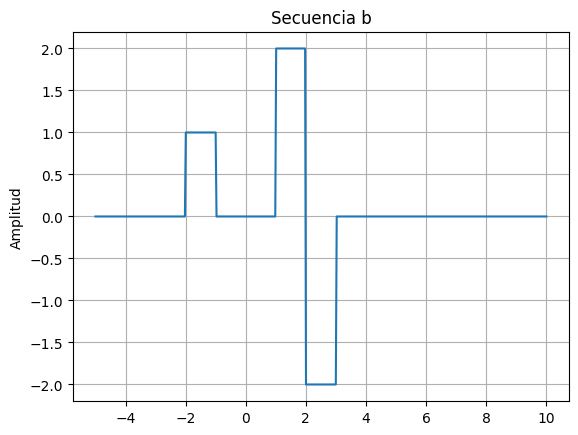

In [5]:
def z(t):
    x1 = t*0
    lista0 = [1, -1, 2, -4, 2]
    lista1 = [-2, -1, 1, 2, 3]
    for i,j in enumerate(lista1):
        x = escalon(t, j)
        x = x * lista0[i]
        x1 += x
    return x1

x1 = z(t)
plt.plot(t, x1)
plt.grid()
plt.title("Secuencia b")
plt.ylabel("Amplitud")

 w(t) = z(t)*r(2(t + k) - 6)

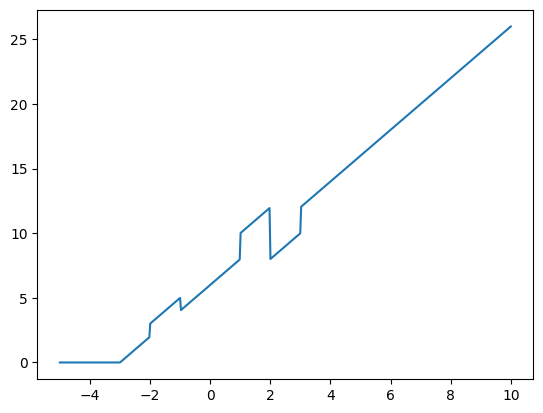

In [6]:
def w(t):
    x1 = z(t)
    r = rampa(2*(t + k) - 6,0)
    return x1 + r

plt.plot(t,w(t))

Encontrar la transformada de fourier


x(t)= 4 ∗cos(8πt + (π /4))+ k ∗ sen(4πt)+ 5 Con k = 2(a+1) con a = último número de la cédula

In [7]:
from numpy import cos, pi, sin

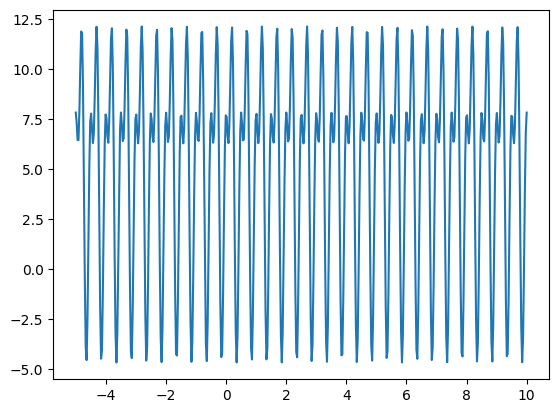

In [8]:
xt = 4*cos(8*pi*t+(pi/4)) + k * sin(4*pi*t) + 5
plt.plot(t, xt)

Para esto asumimos que la señal dura un total de 1 segundo.

In [9]:
fft = np.fft.fft(xt)
freqs = np.fft.fftfreq(len(xt), d=1/len(xt)) 

p_freqs = freqs[:len(freqs)//2]
p_fft = np.abs(fft[:len(fft)//2])

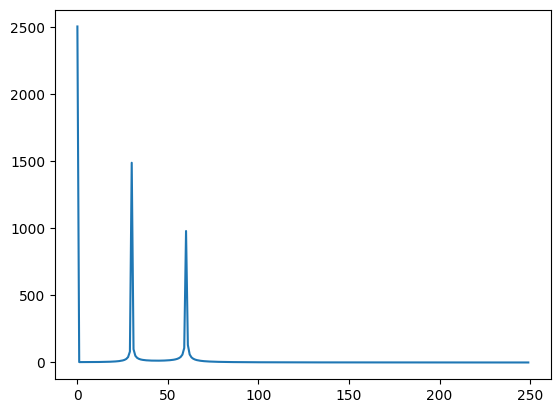

In [10]:
plt.plot(p_freqs, p_fft)
plt.show()

4. Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10 segundos de la señal usando Colab (10%)

x(t)= 4 ∗cos(80πt + (π /4))+ k ∗ sen(40πt)+ 5 Con k = 2(a+1) con a = último número de la cédula

La frecuencia mas grande que hay es 80pi, que en herz sería 40Hz, según el teorema de nyquist tendriamos que poner una frecuencia de muestreo de minimo 80Hz.

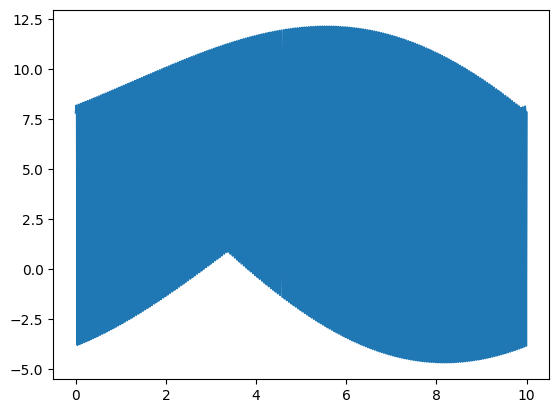

In [11]:
fs = 80
nyquist = fs/2
t = np.linspace(0, 10, 10*fs)
xt = 4*cos(80*pi*t+(pi/4)) + k * sin(40*pi*t) + 5
plt.plot(t, xt)
plt.show()

5. Programar el periodograma de Welch (NO usar la función de scipy) mediante una función que:

In [12]:
def welch(x: int, M: int, S: int, w: np.ndarray, fs: int) -> tuple[np.ndarray, np.ndarray]:
    
    paso = M - S 
    segmentos = [x[i:(i + M)] for i in range(0, len(x) - M + 1, paso)]

    solve = []
    for segmento in segmentos:
        segmento = segmento * w 
        segmento_fourier = np.fft.fft(segmento, n = M) 
        segmento_welch = (np.abs(segmento_fourier) ** 2) / (np.sum(w**2)) 
        solve.append(segmento_welch[:M // 2])  
    
    welch_prom = np.mean(solve, axis=0)
    
    freqs = np.fft.fftfreq(M, d=1/fs)[:M // 2]
    
    return freqs, welch_prom

6. Validar el funcionamiento de la rutina así (10%):



Para el grupo de Luisa, mostrar el funcionamiento de la rutina usando la señal usada del punto 4, M = 40, S = 30, ventana Hamming.

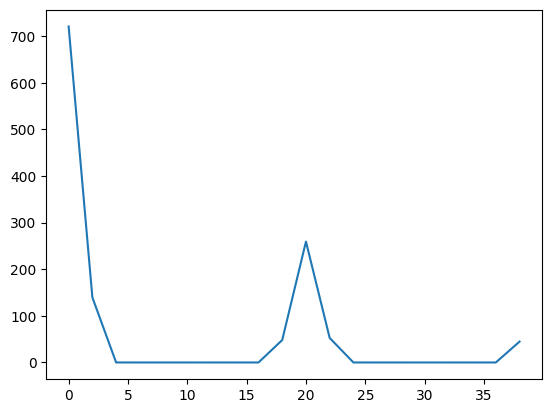

In [13]:
from scipy.signal.windows import hamming

M = 40
S = 30

ham = hamming(M)

freqs, pot = welch(x = xt, M = M, S = S, w = ham, fs = fs)
plt.plot(freqs, pot)

7. Una señal fisiológica definida en el rango entre a Hz y b Hz se toma con frecuencia de muestreo de 100 Hz. Para esta señal:

* Diseñar el filtro pasa-altas teniendo en cuenta que se requiere que en la banda de rechazo la señal de salida sea por lo menos 10 veces menor en amplitud a la señal de entrada (10%)

* Diseñar el filtro pasa-bajas teniendo en cuenta que se requiere que en la banda de rechazo la señal de salida sea por lo menos 100 veces menor en amplitud a la señal de entrada (10%)

* Para el grupo de Luisa a = 5 y b = 50

In [14]:
a = 5
b = 50
orden = 40
fs = 100.00000000000001 # Se hace esto porque la frecuencia de nyquist es la mitad y el cutoff debe ser menor a eso
nyquist = fs/2

In [15]:
import scipy.signal as signal

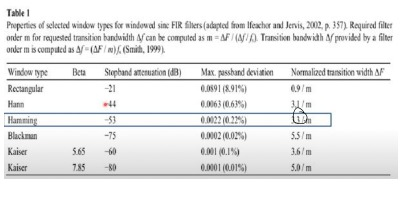

Si quiero tener al menos unos 10dB de rechazo en la banda de rechazo, entonces debo utilizar por lo menos la Rectangular, ya que:

In [16]:
10**(-21/20)

0.08912509381337455

Este valor al ser menor a 0.1, tenemos que entonces es menos de 10 veces.

Para obtener algo de al menos 100 veces mas pequeño, entonces usamos la ventana Hann.

In [17]:
10**(-44/20)

0.00630957344480193

In [18]:
order_lowpass = int(3.1/(1/fs))
order_highpass = int(0.9/(1/fs))
order_lowpass, order_highpass

(310, 90)

In [19]:
lowpass = signal.firwin(order_lowpass+1, b/nyquist, pass_zero = 'lowpass', window = 'hann')
highpass = signal.firwin(order_highpass+1, a/nyquist, pass_zero = 'highpass', window = 'rect')

In [20]:
w, h1 = signal.freqz(lowpass, 1, fs=fs)
_, h2 = signal.freqz(highpass, 1, fs=fs)
hf = h1*h2

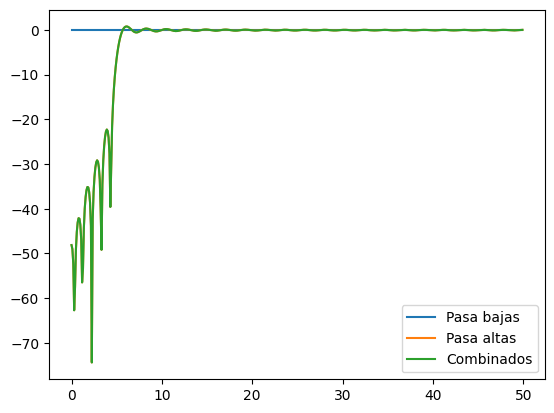

In [21]:
plt.figure()
plt.plot(w, 20 * np.log10(abs(h1)), label = 'Pasa bajas')
plt.plot(w, 20 * np.log10(abs(h2)), label = 'Pasa altas')
plt.plot(w, 20 * np.log10(abs(hf)), label = 'Combinados')
plt.legend()
plt.show()

Se grafica por aparte el pasabajas porque no se nota mucho, podemos observar que por alguna razón, el filtrado se hace, pero se hace en cantidades tan pequeñas, que termina por no afectar al bode combinado.

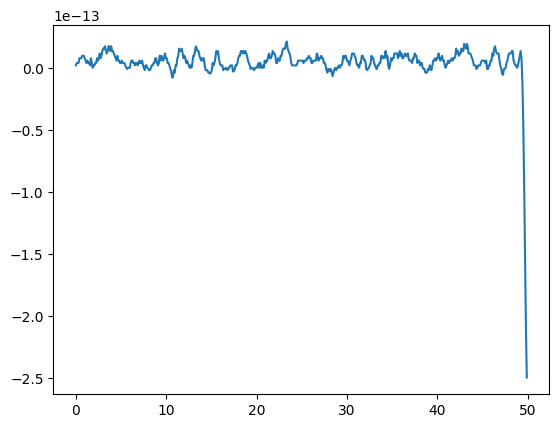

In [ ]:
plt.plot(w, 20 * np.log10(abs(h1)), label = 'Pasa bajas')


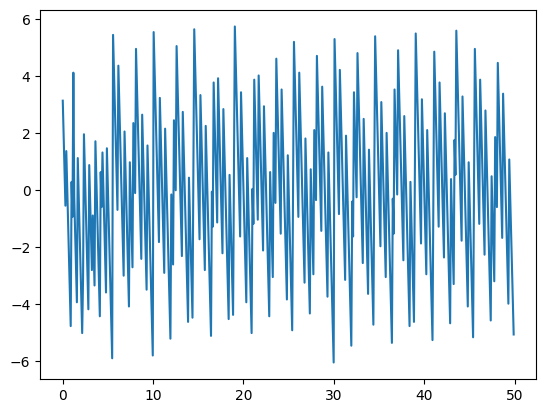

In [22]:
hfase = np.angle(h1) + np.angle(h2)
plt.plot(w, hfase)
